In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

In [2]:
data = pd.read_csv('/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')

##Explore Data

In [3]:
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
data.shape

(200, 5)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
data.drop(['CustomerID'],axis=1,inplace=True)         #Delete CustomerID from data

In [8]:
data

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [9]:
la=LabelEncoder()          #to convert object column to numerical

In [10]:
data['Gender']=la.fit_transform(data['Gender'])


In [11]:
data

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


## Apply the KMeans

In [12]:
no_clusters=[]     # to store the values of clusters
j=[]

In [13]:
for i in range(1,10):
    model=KMeans(n_clusters=i)
    model.fit(data)
    no_clusters.append(i)
    j.append(model.inertia_)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

In [14]:
pd.DataFrame(no_clusters,j)      #make DataFrame contain (no_clusters,j)

,0
308862.060000,1
212889.442455,2
143391.592360,3
104414.675342,4
75399.615414,5
58350.654495,6
51179.498343,7
44355.313518,8
40663.673156,9


Text(0, 0.5, 'j')

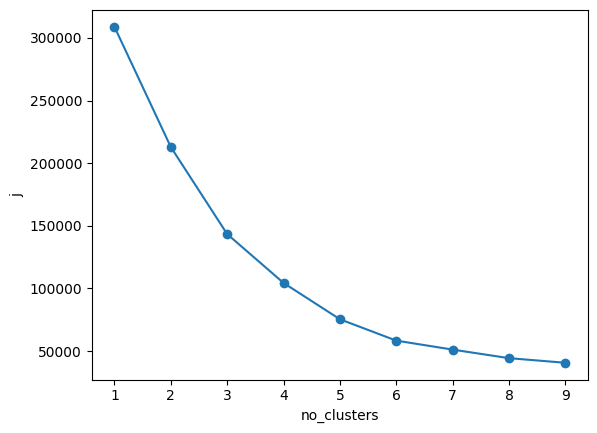

In [15]:
plt.plot(no_clusters,j,marker='o')
plt.xlabel('no_clusters')
plt.ylabel('j')

In [16]:
model=KMeans(n_clusters=5)
model.fit(data)
pre=model.predict(data)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [17]:
data['KMeans']=pre      #add KMeans column to data

In [18]:
data

,Gender,Age,Annual Income (k$),Spending Score (1-100),KMeans
0,1,19,15,39,1
1,1,21,15,81,4
2,0,20,16,6,1
3,0,23,16,77,4
4,0,31,17,40,1
...,...,...,...,...,...
195,0,35,120,79,0
196,0,45,126,28,3
197,1,32,126,74,0
198,1,32,137,18,3


In [19]:
group1=data[data['KMeans']==0]
group2=data[data['KMeans']==1]
group3=data[data['KMeans']==2]
group4=data[data['KMeans']==3]
group5=data[data['KMeans']==4]



##plot the final cluster

Text(0, 0.5, 'Spending Score')

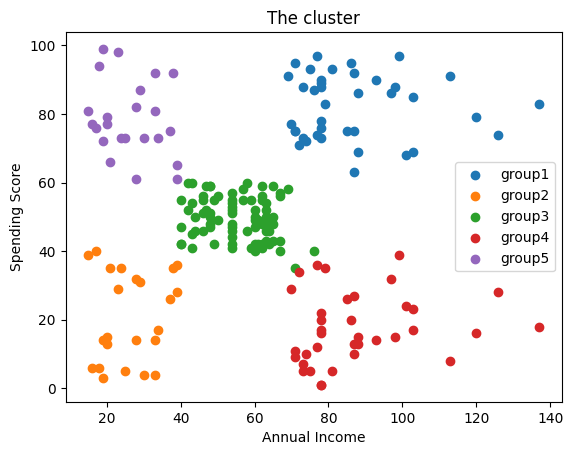

In [20]:
plt.scatter(group1['Annual Income (k$)'],group1['Spending Score (1-100)'],label='group1')
plt.scatter(group2['Annual Income (k$)'],group2['Spending Score (1-100)'],label='group2')
plt.scatter(group3['Annual Income (k$)'],group3['Spending Score (1-100)'],label='group3')
plt.scatter(group4['Annual Income (k$)'],group4['Spending Score (1-100)'],label='group4')
plt.scatter(group5['Annual Income (k$)'],group5['Spending Score (1-100)'],label='group5')
plt.legend()
plt.title('The cluster')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')

In [21]:
data['KMeans'].value_counts()

KMeans
2    79
0    39
3    36
1    23
4    23
Name: count, dtype: int64

In [22]:
##Distribution graphs

<Axes: xlabel='KMeans', ylabel='count'>

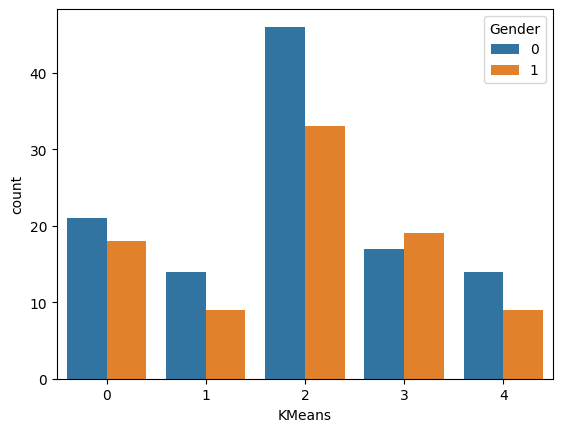

In [23]:
sns.countplot(data,x='KMeans',hue='Gender')

<Axes: ylabel='count'>

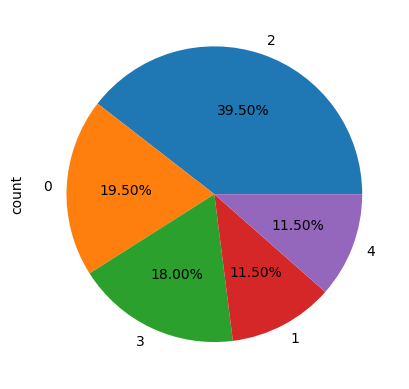

In [24]:
data['KMeans'].value_counts().plot.pie(autopct='%0.2f%%')

<Axes: xlabel='KMeans', ylabel='Spending Score (1-100)'>

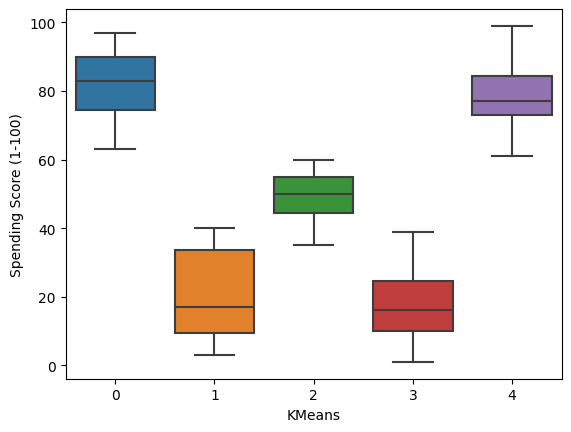

In [25]:
sns.boxplot(data=data,x='KMeans',y='Spending Score (1-100)')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='KMeans', ylabel='Spending Score (1-100)'>

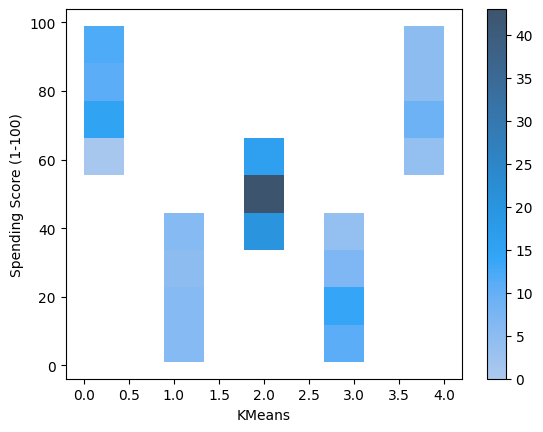

In [26]:
sns.histplot(data,x='KMeans',y='Spending Score (1-100)',cbar=True)

<Axes: xlabel='KMeans', ylabel='Spending Score (1-100)'>

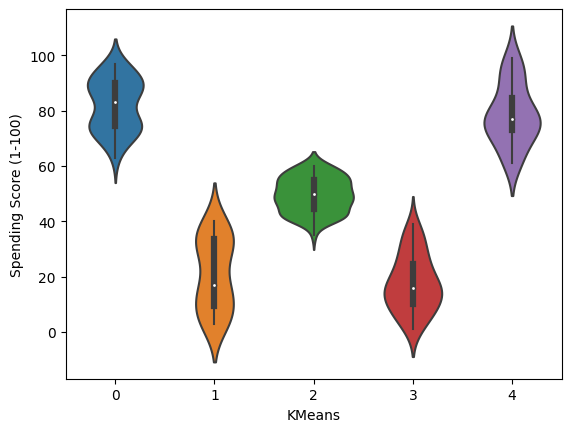

In [27]:
sns.violinplot(data=data, x="KMeans", y="Spending Score (1-100)")  #to note the density

/tmp/ipykernel_32/2833089579.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=data,x='KMeans',y='Spending Score (1-100)',thresh=.1,cmap='Blues',shade=True)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='KMeans', ylabel='Spending Score (1-100)'>

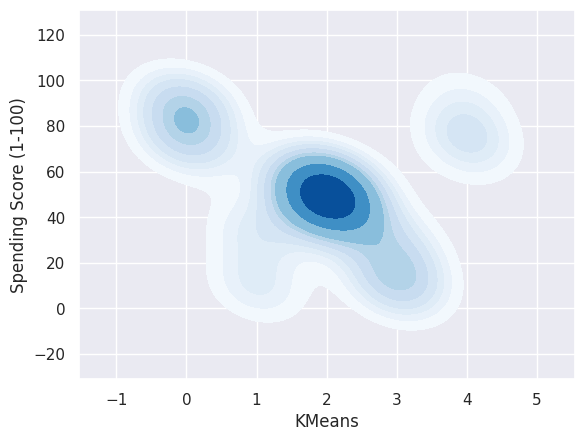

In [28]:
sns.set_theme(style="darkgrid")

sns.kdeplot(data=data,x='KMeans',y='Spending Score (1-100)',thresh=.1,cmap='Blues',shade=True)

/tmp/ipykernel_32/3351874835.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=data,x='KMeans',y='Spending Score (1-100)',thresh=.1,cmap='Blues',shade=True,cbar=True)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='KMeans', ylabel='Spending Score (1-100)'>

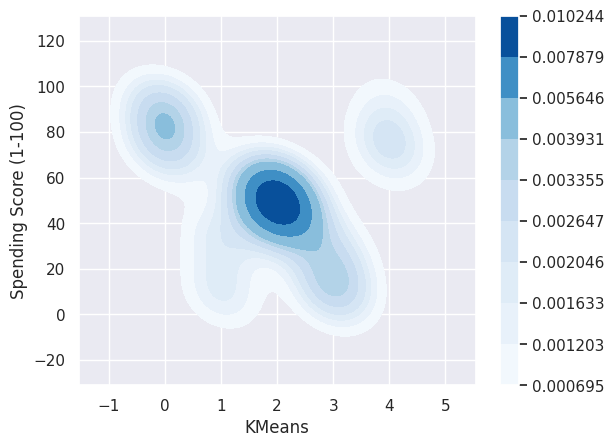

In [29]:
sns.set_theme(style="darkgrid")

sns.kdeplot(data=data,x='KMeans',y='Spending Score (1-100)',thresh=.1,cmap='Blues',shade=True,cbar=True)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

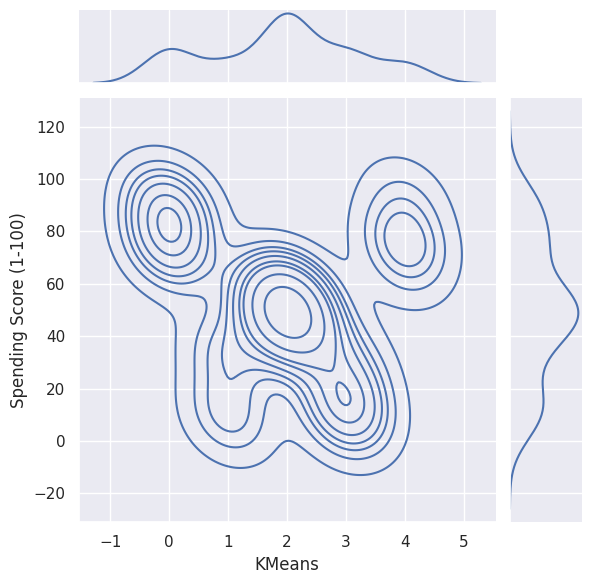

In [30]:
sns.jointplot(data=data,x="KMeans", y="Spending Score (1-100)",kind="kde")

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: xlabel='KMeans', ylabel='Spending Score (1-100)'>

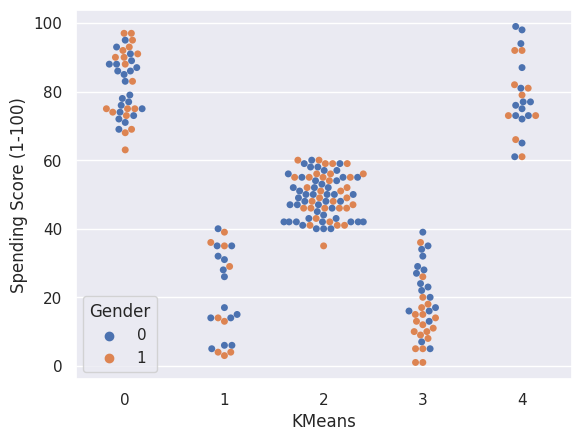

In [31]:
 sns.swarmplot(data=data, x="KMeans", y="Spending Score (1-100)",hue='Gender')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


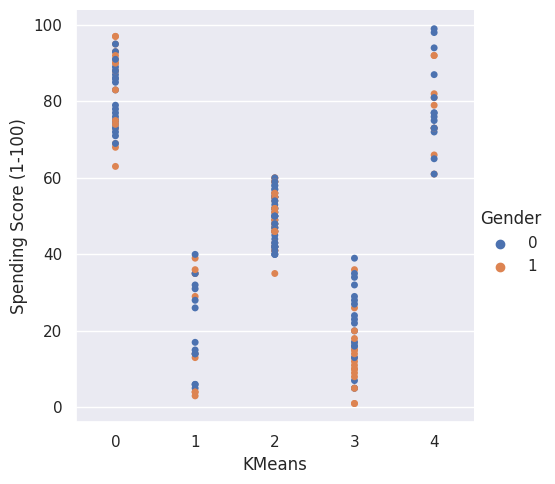

In [32]:
sns.catplot(data=data, x="KMeans", y="Spending Score (1-100)", jitter=False,hue='Gender')
